# import dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

(Xtrain , Ytrain) , (Xtest , Ytest) = tf.keras.datasets.mnist.load_data()

Xtrain = Xtrain[:,:,:,None] / 255
Xtest = Xtest[:,:,:,None] / 255

# Xtrain = tf.image.resize(Xtrain , (32,32))
# Xtest = tf.image.resize(Xtest , (32,32))


In [2]:
Xtrain.shape

(60000, 28, 28, 1)

# Auto Encoder 2D

In [3]:
encoded_inputs = tf.keras.Input(shape=(Xtrain.shape[1:]))
x = tf.keras.layers.Conv2D(16 , (3,3) , activation='relu' , padding='same')(encoded_inputs)
x = tf.keras.layers.MaxPool2D(padding='same')(x)
x = tf.keras.layers.Conv2D(8 , (3,3) , activation='relu' , padding='same')(x)
x = tf.keras.layers.MaxPool2D(padding='same')(x)
x = tf.keras.layers.Conv2D(8 , (3,3) , activation='relu' , padding='same')(x)
encoded = tf.keras.layers.MaxPool2D(padding='same')(x)
encoder = tf.keras.Model(encoded_inputs , encoded , name="encoder")

In [4]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0   

In [5]:
decoded_inputs = tf.keras.Input(shape=encoded.shape[1:])
x = tf.keras.layers.Conv2D(8 , (3,3) , activation='relu' , padding='same')(decoded_inputs)
x = tf.keras.layers.UpSampling2D()(x)
x = tf.keras.layers.Conv2D(8 , (3,3) , activation='relu' , padding='same')(x)
x = tf.keras.layers.UpSampling2D()(x)
x = tf.keras.layers.Conv2D(16 , (3,3) , activation='relu')(x)
x = tf.keras.layers.UpSampling2D()(x)
decoded = tf.keras.layers.Conv2D(1 , (3,3) , activation='sigmoid' , padding='same')(x)
decoder = tf.keras.Model(decoded_inputs , decoded , name="decoder")

In [6]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4, 4, 8)]         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 16)        0   

In [7]:
model = tf.keras.Model(encoded_inputs , decoder(encoder(encoded_inputs)) , name='autoencoder')

In [8]:
model.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 4, 4, 8)           1904      
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         2481      
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='sgd' , loss='mse')

In [24]:
model.fit(Xtrain , Xtrain , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0270
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0266
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0263
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0260
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0257
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0254
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0252
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0249
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0247
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0245


In [25]:
Z = encoder(Xtest)
Z.shape

TensorShape([10000, 4, 4, 8])

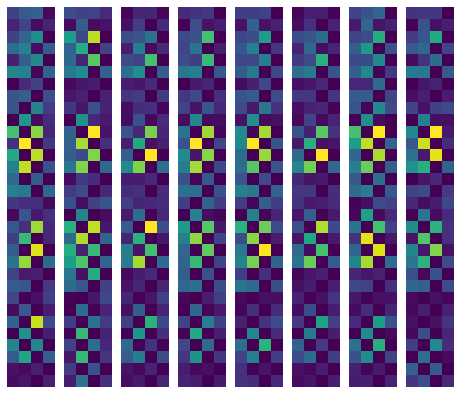

In [26]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,8))
for i in range(0,8):
  plt.subplot(1,8,i+1)
  plt.imshow(Z[i].numpy().reshape(32,-1))
  plt.axis('off')
plt.show()

### Denoising

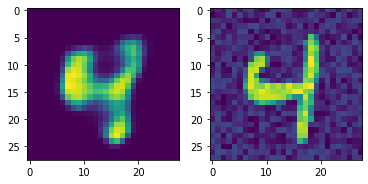

In [31]:
import numpy as np 

X = Xtest + 0.3 * np.random.rand(*Xtest.shape)
X /= X.max()
Z = model.predict(X)

idx = 1230

#Z = np.round(Z)
plt.subplot(1 , 2 , 1)
plt.imshow(Z[idx,:,:,0])
plt.subplot(1 , 2 , 2)
plt.imshow(X[idx,:,:,0])
plt.show()